In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
from astropy.table import Table

In [2]:
data_folder = 'galaxyData/'
gal_files = glob.glob(data_folder + "*")
gal_files.sort()
print (len(gal_files))

11


In [32]:
gal_spectra = []

for gal_file in gal_files:
    with open(gal_file) as gal_data:
        
        spectrum_rows = []
        
        for j, row in enumerate(gal_data, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val) 
                    
            tot_spectrum = tot_spectrum + np.float64(spec)
        tot_spectrum = tot_spectrum / len(spectrum_rows)
            
        gal_spectra.append(tot_spectrum)

In [33]:
calib = gal_spectra[0]
gal_spectra.pop(0)

array([ 0.        ,  0.        ,  0.        , ...,  8.61516239,
        8.62274359,  8.59753846])

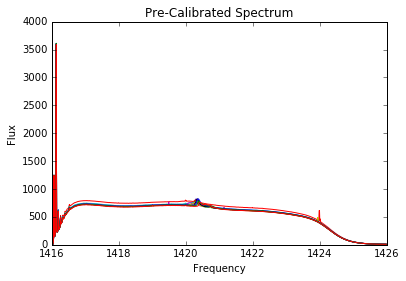

In [34]:
frequency = np.arange(1416,1426,0.009766)
for i in range(0, len(gal_spectra)):
    plt.plot(frequency,gal_spectra[i])
plt.title('Pre-Calibrated Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Flux')
plt.show()

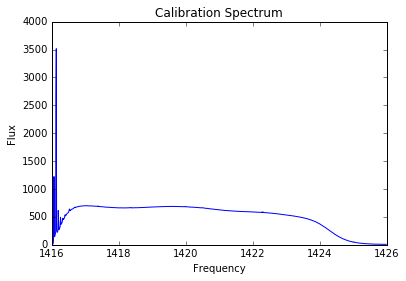

In [35]:
plt.plot(frequency,calib)
plt.title('Calibration Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Flux')
plt.show()

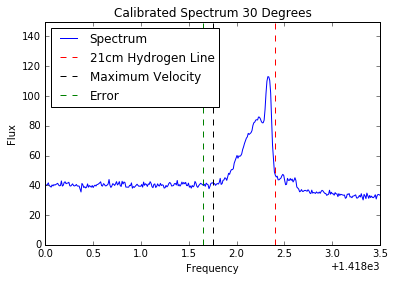

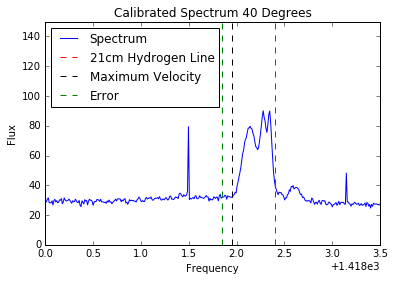

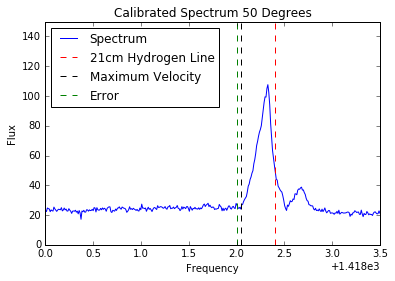

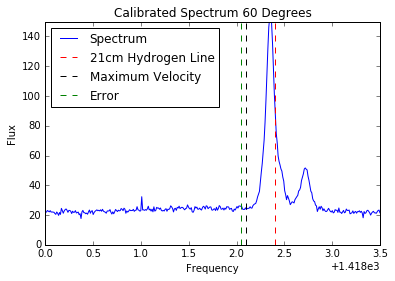

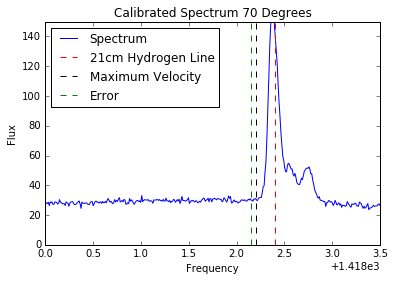

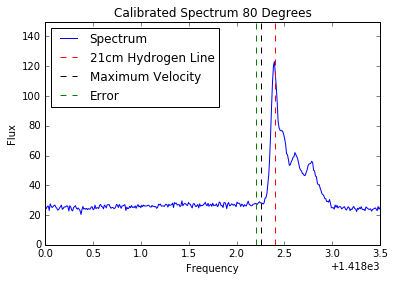

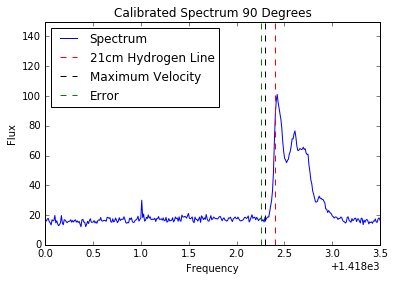

In [36]:
hline = 1420.4
freq = [1420.05,1419.5,1419.65,1419.75,1419.95,1420.05,1420.1,1420.2,1420.25,1420.3]
freq_err = [1420, 1419.4, 1419.5, 1419.65, 1419.85, 1420, 1420.05, 1420.15, 1420.2, 1420.25]

for i in range(0, len(gal_spectra)):
    gal_spectra[i] = gal_spectra[i] - calib

for i in range(0, len(gal_spectra)):
    plt.figure()
    plt.plot(frequency,gal_spectra[i], color='b', label='Spectrum')
    plt.title('Calibrated Spectrum {} Degrees'.format(i*10))
    plt.xlim(1418,1421.5)
    plt.ylim(0,150)
    plt.axvline(hline, linestyle='--', color='r', label='21cm Hydrogen Line')
    plt.axvline(freq[i], linestyle='--', color='k', label='Maximum Velocity')
    plt.axvline(freq_err[i], linestyle='--', color='g', label='Error')
    plt.legend(loc=0)
    plt.xlabel('Frequency')
    plt.ylabel('Flux')
    plt.show()

In [37]:
c = 3e5 #km/s
v_sun = 220 #km/s
R_0 = 8.12 #kpc
vlsr = [10.48, 9.86, 8.96, 7.77, 6.33, 4.70, 2.93, 1.07, -0.82, -2.68]

freq_diffs = []
for i in range(0,len(freq)):
    freq_diffs.append(abs(hline - freq[i]))
freq_diffs_err = []
for i in range(0,len(freq_err)):
    freq_diffs_err.append(abs(hline - freq_err[i]))

v_change = []
for i in range(0, len(freq)):
    v_change.append(freq_diffs[i] * c / hline)
v_change_err = []
for i in range(0, len(freq_err)):
    v_change_err.append(freq_diffs_err[i] * c / hline)
    
v_corrected = []
for i in range(0, len(v_change)):
    v_corrected.append(v_change[i] + v_sun * np.sin(np.radians(i * 10)) + vlsr[i])
v_corrected_err = []
for i in range(0, len(v_change_err)):
    v_corrected_err.append(v_change_err[i] + v_sun * np.sin(np.radians(i * 10)) + vlsr[i])
    
dist_from_center = []
for i in range(0,len(v_corrected)):
    dist_from_center.append(R_0 * np.sin(np.radians(i * 10)))

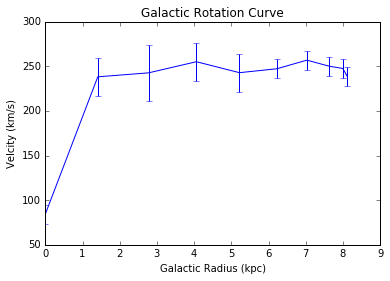

In [39]:
error = []
for i in range(0,len(v_corrected)):
    error.append(v_corrected_err[i] - v_corrected[i])
plt.errorbar(dist_from_center, v_corrected, yerr=error)
plt.title('Galactic Rotation Curve')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('Velcity (km/s)')
plt.show()

In [40]:
long = [0,10,20,30,40,50,60,70,80,90]
error = []
for i in range(0,len(v_corrected)):
    error.append(v_corrected_err[i] - v_corrected[i])

table = Table([long, freq, v_corrected, error, dist_from_center], names = ('Galactic Longitude (deg)', 'Most Negative Frequency (MHz)', 'Maximum 21cm Velocity (km/s)', r'Estimated Error (km/s) $\pm$','Tangential Distance From GC (kpc)'), meta={'name': 'Results'})
table.show_in_notebook()